# 相関

作品ごとのポイントとキャラ、音楽の作品ごとポイント集計値のxyプロットで相関関係を概観する。

In [3]:
from bs4 import BeautifulSoup 
import pandas as pd

In [ ]:
import glob
import matplotlib as mpl
import matplotlib.pyplot as plt  # これを呼ばないと matplotlib.font_manager にアクセスできない
import numpy as np

plot日本語化

In [ ]:
plt.rcParams['font.family'] = 'Noto Sans CJK JP'

import shutil
from pathlib import Path

config_dir = Path(mpl.get_configdir())
config_dir.mkdir(exist_ok=True, parents=True)

default_config_path = Path(mpl.__file__).parent / "mpl-data/matplotlibrc"
config_path = config_dir / "matplotlibrc"
shutil.copyfile(default_config_path, config_path)

In [1]:
!wget https://w.atwiki.jp/toho/pages/842.html 

--2022-11-26 12:27:10--  https://w.atwiki.jp/toho/pages/842.html
w.atwiki.jp (w.atwiki.jp) をDNSに問いあわせています... 18.65.216.60, 18.65.216.71, 18.65.216.77, ...
w.atwiki.jp (w.atwiki.jp)|18.65.216.60|:443 に接続しています... 接続しました。
HTTP による接続要求を送信しました、応答を待っています... 403 Forbidden
2022-11-26 12:27:10 エラー 403: Forbidden。



In [4]:
filename="842.html"
with open(filename,"r") as fp:
    htmltext=fp.read()
soup = BeautifulSoup(htmltext, "html.parser")

In [5]:
titles=soup.find_all("h4")
titles=[t.string for t in titles]

In [162]:
tables=soup.find_all("table")

In [163]:
tables= [ pd.read_html(str(t))[0] for t in tables]

In [164]:
for i,[title,t] in enumerate(zip(titles,tables)):
    t.columns=t.iloc[0]
    t["title"]=title
    t=t.drop([0])
tables=[t.drop([0]) for t in tables]

In [165]:
tables[0]

,Number,Track Name,Notes,title
1,01,赤より紅い夢,タイトル画面テーマ,東方紅魔郷 ～ the Embodiment of Scarlet Devil.
2,02,ほおずきみたいに紅い魂,１面テーマ,東方紅魔郷 ～ the Embodiment of Scarlet Devil.
3,03,妖魔夜行,１面ボス・ルーミアのテーマ,東方紅魔郷 ～ the Embodiment of Scarlet Devil.
4,04,ルーネイトエルフ,２面テーマ,東方紅魔郷 ～ the Embodiment of Scarlet Devil.
5,05,おてんば恋娘,２面ボス・チルノのテーマ,東方紅魔郷 ～ the Embodiment of Scarlet Devil.
6,06,上海紅茶館 ～ Chinese Tea,３面テーマ,東方紅魔郷 ～ the Embodiment of Scarlet Devil.
7,07,明治十七年の上海アリス,３面ボス・紅 美鈴のテーマ,東方紅魔郷 ～ the Embodiment of Scarlet Devil.
8,08,ヴワル魔法図書館,４面テーマ,東方紅魔郷 ～ the Embodiment of Scarlet Devil.
9,09,ラクトガール ～ 少女密室,４面ボス・パチュリー・ノーレッジのテーマ,東方紅魔郷 ～ the Embodiment of Scarlet Devil.
10,10,メイドと血の懐中時計,５面テーマ,東方紅魔郷 ～ the Embodiment of Scarlet Devil.


In [166]:
totaltable=pd.concat(tables)

In [167]:
totaltable[:20]

,Number,Track Name,Notes,title
1,01,赤より紅い夢,タイトル画面テーマ,東方紅魔郷 ～ the Embodiment of Scarlet Devil.
2,02,ほおずきみたいに紅い魂,１面テーマ,東方紅魔郷 ～ the Embodiment of Scarlet Devil.
3,03,妖魔夜行,１面ボス・ルーミアのテーマ,東方紅魔郷 ～ the Embodiment of Scarlet Devil.
4,04,ルーネイトエルフ,２面テーマ,東方紅魔郷 ～ the Embodiment of Scarlet Devil.
5,05,おてんば恋娘,２面ボス・チルノのテーマ,東方紅魔郷 ～ the Embodiment of Scarlet Devil.
6,06,上海紅茶館 ～ Chinese Tea,３面テーマ,東方紅魔郷 ～ the Embodiment of Scarlet Devil.
7,07,明治十七年の上海アリス,３面ボス・紅 美鈴のテーマ,東方紅魔郷 ～ the Embodiment of Scarlet Devil.
8,08,ヴワル魔法図書館,４面テーマ,東方紅魔郷 ～ the Embodiment of Scarlet Devil.
9,09,ラクトガール ～ 少女密室,４面ボス・パチュリー・ノーレッジのテーマ,東方紅魔郷 ～ the Embodiment of Scarlet Devil.
10,10,メイドと血の懐中時計,５面テーマ,東方紅魔郷 ～ the Embodiment of Scarlet Devil.


In [168]:
totaltable.to_csv("data/music_title.csv")

In [170]:
tables[0].replace("テーマ","",regex=True)

,Number,Track Name,Notes,title
1,01,赤より紅い夢,タイトル画面,東方紅魔郷 ～ the Embodiment of Scarlet Devil.
2,02,ほおずきみたいに紅い魂,１面,東方紅魔郷 ～ the Embodiment of Scarlet Devil.
3,03,妖魔夜行,１面ボス・ルーミアの,東方紅魔郷 ～ the Embodiment of Scarlet Devil.
4,04,ルーネイトエルフ,２面,東方紅魔郷 ～ the Embodiment of Scarlet Devil.
5,05,おてんば恋娘,２面ボス・チルノの,東方紅魔郷 ～ the Embodiment of Scarlet Devil.
6,06,上海紅茶館 ～ Chinese Tea,３面,東方紅魔郷 ～ the Embodiment of Scarlet Devil.
7,07,明治十七年の上海アリス,３面ボス・紅 美鈴の,東方紅魔郷 ～ the Embodiment of Scarlet Devil.
8,08,ヴワル魔法図書館,４面,東方紅魔郷 ～ the Embodiment of Scarlet Devil.
9,09,ラクトガール ～ 少女密室,４面ボス・パチュリー・ノーレッジの,東方紅魔郷 ～ the Embodiment of Scarlet Devil.
10,10,メイドと血の懐中時計,５面,東方紅魔郷 ～ the Embodiment of Scarlet Devil.


### タイトル英語部分除去

In [193]:
totaltable["title"]=totaltable["title"].replace('\u3000.*',"",regex=True)
totaltable["title"]=totaltable["title"].replace('～.*',"",regex=True)
totaltable["title"]=totaltable["title"].replace(' - .*',"",regex=True)

In [194]:
totaltable["title"].unique()

array(['東方紅魔郷', '東方妖々夢', '東方永夜抄', '東方萃夢想', '東方花映塚', '東方文花帖', '東方風神録',
       '東方緋想天', '東方地霊殿', '東方星蓮船', '東方非想天則', 'ダブルスポイラー', '妖精大戦争', '東方神霊廟',
       '東方心綺楼', '東方輝針城', '弾幕アマノジャク', '東方深秘録', '東方紺珠伝', '東方天空璋', '東方憑依華',
       '秘封ナイトメアダイアリー', '東方鬼形獣', '東方虹龍洞', '東方剛欲異聞', '東方靈異伝', '東方封魔録',
       '東方夢時空', '東方幻想郷', '東方怪綺談', '秋霜玉', '稀翁玉', 'トルテルマジック', 'Cradle',
       '黄昏酒場', '神魔討綺伝 ', '東方幻想麻雀', 'メニュー'], dtype=object)

In [210]:
#全角半角を揃える
totaltable=totaltable.replace("　～ "," 〜 ",regex=True)
totaltable=totaltable.replace("　〜 "," 〜 ",regex=True)

In [207]:
totaltable.columns=['Number', '名前', 'Notes', 'title']

In [197]:
music_points_ratio=pd.read_csv("data/music_points_ratio.csv")
#music_title=pd.read_csv("data/music_title.csv")

In [201]:
music_points_ratio

,Unnamed: 0,名前,1,2,3,4,5,6,7,8,9,11,12,13,14,15,16,17,18
0,0,亡き王女の為のセプテット,0.119469,0.087164,0.048581,0.043529,0.042536,0.038133,0.034467,0.033908,0.032834,0.033786,0.036179,0.035007,0.031909,0.032294,0.032965,0.034265,0.037977
1,1,U.N.オーエンは彼女なのか？,0.113569,0.081247,0.056283,0.046090,0.059066,0.034963,0.028999,0.028934,0.030196,0.036179,0.037559,0.035553,0.032676,0.031015,0.034282,0.042743,0.054399
2,2,明治十七年の上海アリス,0.072271,0.036641,0.018471,0.010242,0.006845,0.006566,0.005165,0.005034,0.005406,0.006173,0.006149,0.006122,0.006130,0.006933,0.007310,0.008114,0.009505
3,3,上海紅茶館 〜 Chinese Tea,0.069322,0.035503,0.022351,0.000000,0.025480,0.019565,0.017053,0.017199,0.015953,0.017860,0.018910,0.018843,0.017403,0.017491,0.018357,0.019593,0.020649
4,4,月時計 〜 ルナ・ダイアル,0.066372,0.029813,0.022293,0.000000,0.014687,0.011909,0.010710,0.010873,0.010427,0.010618,0.012662,0.012755,0.011374,0.011045,0.011751,0.013554,0.016455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681,681,大地の底、剛欲の海,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000267
682,682,七ツ石の狼、雲を取りに駆ける,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000264
683,683,ワクワクする見慣れた幻想郷,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000214
684,684,東方剛欲異聞,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000150


In [212]:
music_points_ratio_subtitle=pd.merge(music_points_ratio,totaltable,on="名前",how="outer")

In [217]:
music_points_ratio_subtitle=music_points_ratio_subtitle.groupby(['title']).sum()
music_points_ratio_subtitle

,Unnamed: 0,1,2,3,4,5,6,7,8,9,11,12,13,14,15,16,17,18
title,,,,,,,,,,,,,,,,,,
Cradle,131.0,0.000000,0.000000,0.050724,0.000000,0.009402,0.007345,0.005253,0.004498,0.004107,0.004097,0.004002,0.004440,0.004172,0.004039,0.003365,0.003420,0.003075
ダブルスポイラー,2574.0,0.000000,0.000000,0.000000,0.000000,0.012242,0.008863,0.006615,0.027892,0.022421,0.013974,0.011428,0.011257,0.010466,0.010956,0.009735,0.008427,0.006938
トルテルマジック,201.0,0.007375,0.004779,0.002953,0.001707,0.000771,0.000724,0.000694,0.000671,0.000623,0.000752,0.000696,0.000785,0.000745,0.000752,0.000732,0.000624,0.000746
メニュー,1643.0,0.001475,0.000000,0.000811,0.001014,0.000508,0.000724,0.000532,0.000551,0.000528,0.000914,0.000923,0.000789,0.000891,0.001133,0.001056,0.001043,0.000916
妖精大戦争,4438.0,0.000000,0.000000,0.000000,0.000000,0.000132,0.000203,0.000856,0.026149,0.022246,0.018338,0.016334,0.015659,0.014559,0.013732,0.011919,0.009549,0.008551
弾幕アマノジャク,3830.0,0.000000,0.000000,0.000000,0.000000,0.012242,0.008863,0.006615,0.010984,0.010548,0.024598,0.019668,0.020372,0.018713,0.017917,0.016649,0.015249,0.012707
東方剛欲異聞,1347.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004617
東方地霊殿,6929.0,0.000000,0.000000,0.000000,0.000000,0.000132,0.129284,0.113244,0.112702,0.102927,0.094955,0.085020,0.081726,0.076229,0.076874,0.076502,0.067095,0.070123
東方夢時空,4799.0,0.004425,0.006145,0.002664,0.004854,0.007842,0.011769,0.010825,0.011570,0.010888,0.009648,0.008635,0.008839,0.008234,0.008611,0.008610,0.007547,0.006677


In [228]:
music_points_ratio_subtitle=music_points_ratio_subtitle.drop("Unnamed: 0",axis=1)

<AxesSubplot:>

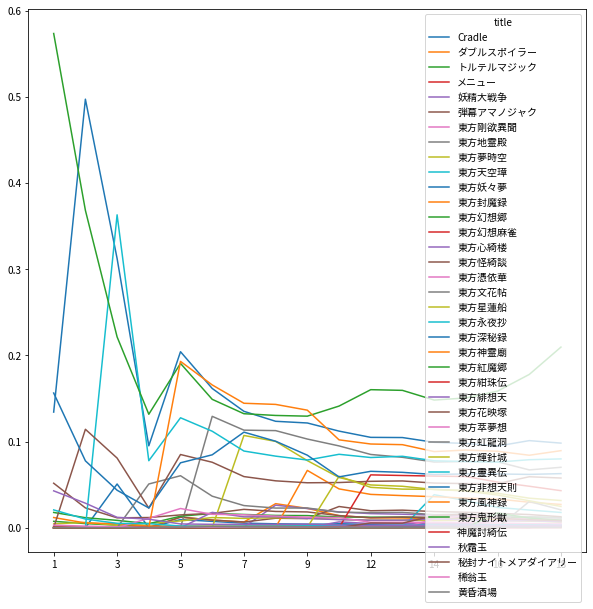

In [236]:
music_points_ratio_subtitle.T.plot(figsize=(10,10))

やはり近年の紅魔郷人気が目立つ

# 作品の投票と音楽の投票の相関を見る

In [239]:
title_points_ratio=pd.read_csv("data/title_points_ratio.csv")
title_points_ratio

,Unnamed: 0,名前,12,13,14,15,16,17,18
0,0,東方紅魔郷,0.111847,0.112262,0.102363,0.105599,0.108930,0.115853,0.142244
1,1,東方永夜抄,0.100213,0.101560,0.096241,0.096502,0.095184,0.097291,0.096774
2,2,東方妖々夢,0.089872,0.090694,0.084319,0.083494,0.082593,0.084051,0.086252
3,3,東方風神録,0.079220,0.079698,0.073878,0.075428,0.078724,0.077559,0.079972
4,4,東方地霊殿,0.068308,0.066046,0.060757,0.063530,0.064347,0.060517,0.062246
5,5,東方紺珠伝,0.058307,0.059633,0.060022,0.060188,0.060861,0.055453,0.048781
6,6,東方鈴奈庵,0.043567,0.046449,0.045372,0.039334,0.030129,0.023493,0.020588
7,7,東方輝針城,0.040094,0.039324,0.036088,0.035346,0.030464,0.025543,0.020289
8,8,東方星蓮船,0.037675,0.035748,0.031748,0.031346,0.030282,0.027710,0.024292
9,9,東方非想天則,0.033472,0.032207,0.029815,0.025848,0.023710,0.018811,0.016000


In [263]:
music_points_ratio_subtitle

,1,2,3,4,5,6,7,8,9,11,12,13,14,15,16,17,18
title,,,,,,,,,,,,,,,,,
Cradle,0.000000,0.000000,0.050724,0.000000,0.009402,0.007345,0.005253,0.004498,0.004107,0.004097,0.004002,0.004440,0.004172,0.004039,0.003365,0.003420,0.003075
ダブルスポイラー,0.000000,0.000000,0.000000,0.000000,0.012242,0.008863,0.006615,0.027892,0.022421,0.013974,0.011428,0.011257,0.010466,0.010956,0.009735,0.008427,0.006938
トルテルマジック,0.007375,0.004779,0.002953,0.001707,0.000771,0.000724,0.000694,0.000671,0.000623,0.000752,0.000696,0.000785,0.000745,0.000752,0.000732,0.000624,0.000746
メニュー,0.001475,0.000000,0.000811,0.001014,0.000508,0.000724,0.000532,0.000551,0.000528,0.000914,0.000923,0.000789,0.000891,0.001133,0.001056,0.001043,0.000916
妖精大戦争,0.000000,0.000000,0.000000,0.000000,0.000132,0.000203,0.000856,0.026149,0.022246,0.018338,0.016334,0.015659,0.014559,0.013732,0.011919,0.009549,0.008551
弾幕アマノジャク,0.000000,0.000000,0.000000,0.000000,0.012242,0.008863,0.006615,0.010984,0.010548,0.024598,0.019668,0.020372,0.018713,0.017917,0.016649,0.015249,0.012707
東方剛欲異聞,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004617
東方地霊殿,0.000000,0.000000,0.000000,0.000000,0.000132,0.129284,0.113244,0.112702,0.102927,0.094955,0.085020,0.081726,0.076229,0.076874,0.076502,0.067095,0.070123
東方夢時空,0.004425,0.006145,0.002664,0.004854,0.007842,0.011769,0.010825,0.011570,0.010888,0.009648,0.008635,0.008839,0.008234,0.008611,0.008610,0.007547,0.006677


In [267]:
music_points_ratio_subtitle["名前"]=music_points_ratio_subtitle.index.values

In [273]:
i=12
title_points_ratio_i=pd.concat([title_points_ratio["名前"],title_points_ratio[str(i)]],axis=1)
ppd=pd.DataFrame(music_points_ratio_subtitle[str(i)])
ppd["名前"]=ppd.index.values
ppd=pd.merge(title_points_ratio_i,ppd,on="名前",how="outer")

In [308]:
ppd

,名前,作品ポイント比率,音楽集計ポイント比率,回
0,東方紅魔郷,0.142244,0.209684,18.0
1,東方永夜抄,0.096774,0.079866,18.0
2,東方妖々夢,0.086252,0.098189,18.0
3,東方風神録,0.079972,0.089427,18.0
4,東方地霊殿,0.062246,0.070123,18.0
...,...,...,...,...
60,東方幻想麻雀,NaN,0.000423,18.0
61,神魔討綺伝,NaN,0.000194,18.0
62,秋霜玉,NaN,0.002262,18.0
63,稀翁玉,NaN,0.000394,18.0


### カラーグラフ作成

In [365]:
import plotly.express as px
from colorspacious import cspace_converter

In [335]:
cm = plt.get_cmap("Spectral")

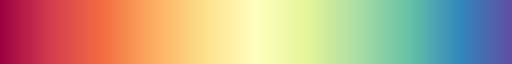

In [341]:
cm

In [372]:
musictitlerate_vs_titlerate=pd.DataFrame()
for i in range(12,19):
    s=str(i)
    title_points_ratio_i=pd.concat([title_points_ratio["名前"],title_points_ratio[str(i)]],axis=1)
    ppd=pd.DataFrame(music_points_ratio_subtitle[s])
    ppd["名前"]=ppd.index.values
    ppd["回"]=int(i)
    ppd["回n"]=(i-12)/(19-12)
    ppd["名前n"]=[j/len(ppd.index) for  j in range(len(ppd.index))]
#    ppd["cmap"]=plt.colormaps(i)
    ppd=pd.merge(title_points_ratio_i,ppd,on="名前",how="outer")
    ppd.columns=["名前","作品ポイント比率","音楽集計ポイント比率","回","回n","名前n"]
    musictitlerate_vs_titlerate=pd.concat([musictitlerate_vs_titlerate,ppd],axis=0)

In [370]:
musictitlerate_vs_titlerate

,名前,作品ポイント比率,音楽集計ポイント比率,回,名前n
0,東方紅魔郷,0.111847,0.160231,0.000000,0.578947
1,東方永夜抄,0.100213,0.081475,0.000000,0.500000
2,東方妖々夢,0.089872,0.104872,0.000000,0.263158
3,東方風神録,0.079220,0.097157,0.000000,0.815789
4,東方地霊殿,0.068308,0.085020,0.000000,0.184211
...,...,...,...,...,...
60,東方幻想麻雀,NaN,0.000423,0.857143,0.342105
61,神魔討綺伝,NaN,0.000194,0.857143,0.868421
62,秋霜玉,NaN,0.002262,0.857143,0.894737
63,稀翁玉,NaN,0.000394,0.857143,0.947368


作品ポイント比率 vs 音楽集計ポイント比率 色は投票回ごと


<AxesSubplot:xlabel='作品ポイント比率', ylabel='音楽集計ポイント比率'>

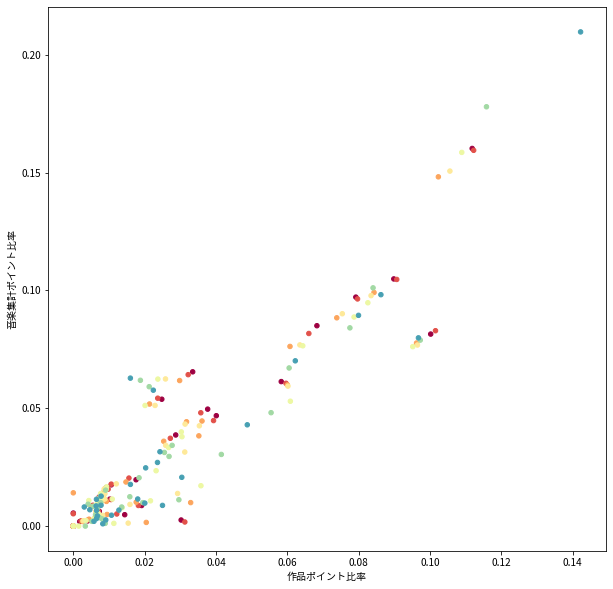

In [360]:
print("作品ポイント比率 vs 音楽集計ポイント比率 色は投票回ごと")
musictitlerate_vs_titlerate.plot.scatter(x="作品ポイント比率",y="音楽集計ポイント比率",c=cm(musictitlerate_vs_titlerate["回"]),figsize=(10,10))


No handles with labels found to put in legend.


作品ポイント比率 vs 音楽集計ポイント比率 色はタイトルごと


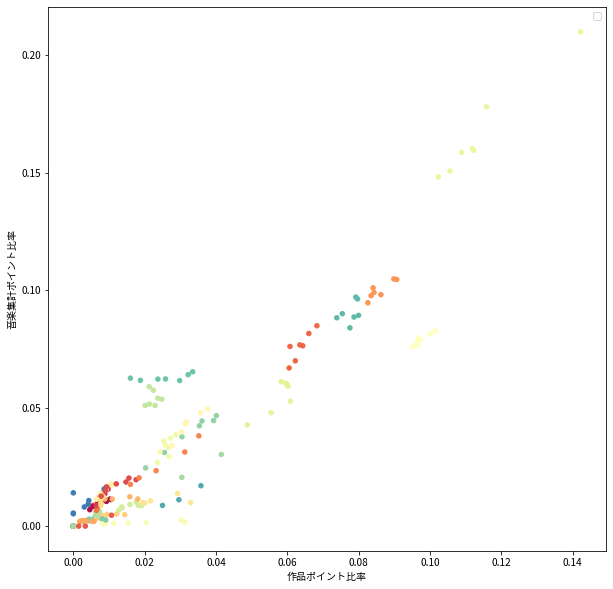

In [362]:
print("作品ポイント比率 vs 音楽集計ポイント比率 色はタイトルごと")
musictitlerate_vs_titlerate.plot.scatter(x="作品ポイント比率",y="音楽集計ポイント比率",c=cm(musictitlerate_vs_titlerate["名前n"]),figsize=(10,10))

音楽の獲得ポイントとサブタイトルの獲得ポイントは大まかに相関しているが外れ値もある。

https://plotly.com/python/line-and-scatter/

In [368]:
fig = px.scatter(musictitlerate_vs_titlerate,
                    x="作品ポイント比率",y="音楽集計ポイント比率",color="名前n",hover_data=['名前'])
fig.show()

In [373]:
fig = px.scatter(musictitlerate_vs_titlerate,
                    x="作品ポイント比率",y="音楽集計ポイント比率",color="回n",hover_data=['回'])
fig.show()

作品によって音楽の人気に違いが見られる。

非想天則、花映塚は相対的に音楽が人気(ゲーム性によるのか)、永夜抄は相対的に作品が人気